### **Proyecto Final: Análisis de Ventas de Cafeterías**

- En este tercer notebook se desarrollarán las siguientes actividades: Creación de nuevas variables, Análisis univariado y visualizaciones, Análisis de Correlación, Análisis multivariado y visualizaciones.
- Para lograr lo anterior, se trabajará con el Dataset modificado que se creó en la etapa anterior de `Limpieza de datos`.

#### I. Importación de Librerias

In [2]:
# A continuación se realiza la importación de las librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### II. Carga de datos Nuevo Dataset (modificado en la limpieza de datos)

In [3]:
# Carga de datos desde archivo CSV
df = pd.read_csv(r'.\ventas_cafeterias_nuevo.csv')
# Tamaño del DataFrame
print(f"Dimensiones del DataFrame: {df.shape}")
# Mostrar primeras 5 filas
df.head()

Dimensiones del DataFrame: (149116, 8)


,transaction_date,transaction_time,transaction_qty,store_location,unit_price,product_category,product_type,product_detail
0,2023-01-01,1900-01-01 07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2023-01-01,1900-01-01 07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,2023-01-01,1900-01-01 07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,2023-01-01,1900-01-01 07:20:24,1,Lower Manhattan,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,2023-01-01,1900-01-01 07:22:41,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


#### III. Creación de variables

##### 1. Explicación nuevas variables

- A continuación, se detallan las variables que se crearán para comenzar a realizar los diferentes análisis.

`1. day (Día):`

    - Tipo de dato: String.
    - Qué refleja: Corresponde al día en que se realizó la transacción, pero escrito en palabras (ej.: "Monday", "Tuesday", etc).
    - Usabilidad: Permitirá crear gráficos e identificar por ejemplo, qué día de la semana se vende mayor cantidad de productos.
    
`2. month (Mes):`
    
    - Tipo de dato: String.
    - Qué refleja: corresponde al mes en que se realizó la transacción, pero escrito en palabras(ej.: "January", "February", "March", etc).
    - Usabilidad: Permitirá crear gráficos y demostrar el comportamiento de una variable en un rango de meses.

`3. year (Año):`

    - Tipo de dato: Int.
    - Qué refleja: Corresponde al año en que se realizó la transacción.
    - Usabilidad: Dado que el dataset solo contine valores de 1 año, si lo vemos desde el punto de vista de la aplicación (punto 7 de la evaluación), nos permitiría conocer por ejemplo, cómo ha sido el evolutivo de las ventas de las tiendas durantes "x" años, hacer comparativos, etc. 
    
`4. hour (Hora):` 
    
    - Tipo de dato: Int.
    - Qué refleja: Corresponde a la hora en que se realizó la transacción, mostrará solo la hora en números (ej.: hora transacción 09:35:10 ==> 9).
    - Usabilidad: Permitirá crear gráficos e identificar por ejemplo, los horarios en que existe mayor demanda de productos.

`5. revenue (Ingresos):` 
    
    - Tipo de dato: float.
    - Qué refleja: Corresponde al monto percibido en cada transacción (resultado de multiplicar: transaction_qty * unit_price).
    - Usabilidad: Permitirá crear gráficos e identificar por ejemplo, cuáles son los productos que generan mayores ingresos, o comparar cuál de las 3 sucursales ha vendido más.

##### 2. Creación de Variables


- Se ha detectado que el tipo de dato de las columnas transaction_date y transaction_time (nuevo dataset), han vuelto a ser tipo object (class str). Por lo tanto, se deben transformar a tipo Datetime para poder crear las nuevas variables.

In [14]:
# Visualización del tipo de dato de las columnas del nuevo dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_date  149116 non-null  object 
 1   transaction_time  149116 non-null  object 
 2   transaction_qty   149116 non-null  int64  
 3   store_location    149116 non-null  object 
 4   unit_price        149116 non-null  float64
 5   product_category  149116 non-null  object 
 6   product_type      149116 non-null  object 
 7   product_detail    149116 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 9.1+ MB


In [16]:
# Cambio del tipo de dato de la columna transaction_date 
df["transaction_date"] = pd.to_datetime(df["transaction_date"])
# Cambio del tipo de dato de la columna transaction_time
df["transaction_time"] = pd.to_datetime(df["transaction_time"])
df["transaction_time"] = pd.to_datetime(df["transaction_time"], format = "%H:%M:%S")

In [17]:
# Validación del cambio realizado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_date  149116 non-null  datetime64[ns]
 1   transaction_time  149116 non-null  datetime64[ns]
 2   transaction_qty   149116 non-null  int64         
 3   store_location    149116 non-null  object        
 4   unit_price        149116 non-null  float64       
 5   product_category  149116 non-null  object        
 6   product_type      149116 non-null  object        
 7   product_detail    149116 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 9.1+ MB


In [18]:
# Creación de nuevas variables

# Variable "day"
df["day"] = df["transaction_date"].dt.day_name()

# Variable "month"
df["month"] = df["transaction_date"].dt.month_name()

# Variable "year"
df["year"] = df["transaction_date"].dt.year

# Variable "hour"
df["hour"] = df["transaction_time"].dt.hour

# Variable "revenue"
df["revenue"] = df["transaction_qty"] * df["unit_price"]

In [19]:
# Mostrar primeras 5 filas del dataframe con las nuevas columnas incorporadas
df.head()

,transaction_date,transaction_time,transaction_qty,store_location,unit_price,product_category,product_type,product_detail,day,month,year,hour,revenue
0,2023-01-01,1900-01-01 07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,Sunday,January,2023,7,6.0
1,2023-01-01,1900-01-01 07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Sunday,January,2023,7,6.2
2,2023-01-01,1900-01-01 07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,Sunday,January,2023,7,9.0
3,2023-01-01,1900-01-01 07:20:24,1,Lower Manhattan,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,Sunday,January,2023,7,2.0
4,2023-01-01,1900-01-01 07:22:41,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Sunday,January,2023,7,6.2


#### IV. Análisis Univariado y Visualizaciones

- En este apartado se analizarán las columnas: transaction_date (day, month, year), transaction_time (hour), transaction_qty, store_location, unit_price y product_category. Esto permitirá conocer cómo se encuentran constituidas y qué información podemos inferir a partir de ellas.

- Para crear los gráficos en esta sección se utilizarán las librerías de seaborn, matplotlib, plotly.

##### 1. Análisis de la Columna: **`transaction_date`**

In [142]:
# Revisamos valores únicos
df["transaction_date"].unique()

<DatetimeArray>
['2023-01-01 00:00:00', '2023-01-02 00:00:00', '2023-01-03 00:00:00',
 '2023-01-04 00:00:00', '2023-01-05 00:00:00', '2023-01-06 00:00:00',
 '2023-01-07 00:00:00', '2023-01-08 00:00:00', '2023-01-09 00:00:00',
 '2023-01-10 00:00:00',
 ...
 '2023-06-21 00:00:00', '2023-06-22 00:00:00', '2023-06-23 00:00:00',
 '2023-06-24 00:00:00', '2023-06-25 00:00:00', '2023-06-26 00:00:00',
 '2023-06-27 00:00:00', '2023-06-28 00:00:00', '2023-06-29 00:00:00',
 '2023-06-30 00:00:00']
Length: 181, dtype: datetime64[ns]

In [143]:
# Debido que se crearon las variables Año, mes y día a partir de transaction_date, podemos ir analizando cada una de ellas

# 1. Revisemos valores únicos de Año
df["year"].unique()

array([2023], dtype=int32)

- **Observación:** Podemos apreciar que el dataframe sólo contiene transacciones del año 2023.

In [92]:
# 2. Revisemos valores únicos de Mes
df["month"].unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [93]:
# Revisamos las transacciones totales por mes
month_qty = df["month"].value_counts()
month_qty

month
June        35352
May         33527
April       25335
March       21229
January     17314
February    16359
Name: count, dtype: int64

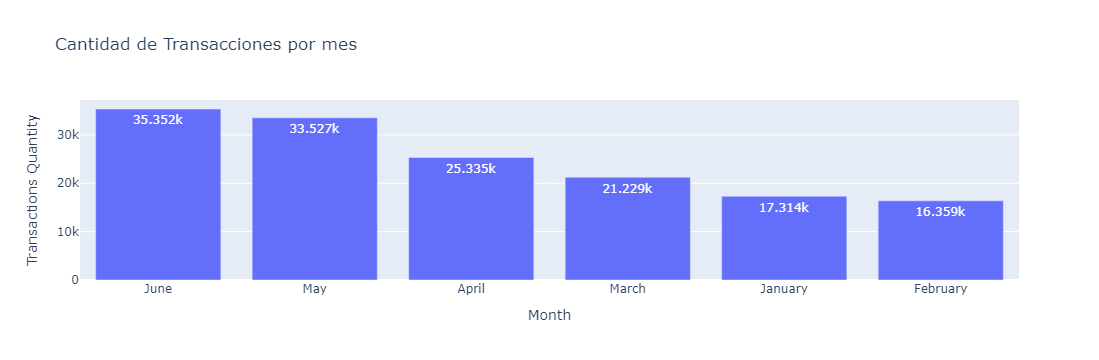

In [94]:
# Configuración gráfico
fig = px.bar(x=month_qty.index, y=month_qty.values,
             labels={'x': 'Month', 'y': 'Transactions Quantity'},
             title='Cantidad de Transacciones por mes',
             text_auto=True)

# Mostrar el gráfico
fig.show()

- **Observación:** Podemos apreciar que durante el més de Junio 2023 es cuando se realizaron la mayor cantidad de transacciones o ventas en las cafeterías. Además, podemos observar que han ido en incremento a partir de marzo (en febrero tuvo una leve baja).
- **Gráfico utilizado:** Se ha utilizado un gráfico de barras vertical (librería plotly). Es amigable a simple vista y permite identificar claramente valores superiores e inferiores.

In [95]:
# 3. Revisemos valores únicos de Dia
df["day"].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [96]:
# Revisamos las transacciones totales por día
day_qty = df["day"].value_counts()
day_qty

day
Friday       21701
Thursday     21654
Monday       21643
Wednesday    21310
Tuesday      21202
Sunday       21096
Saturday     20510
Name: count, dtype: int64

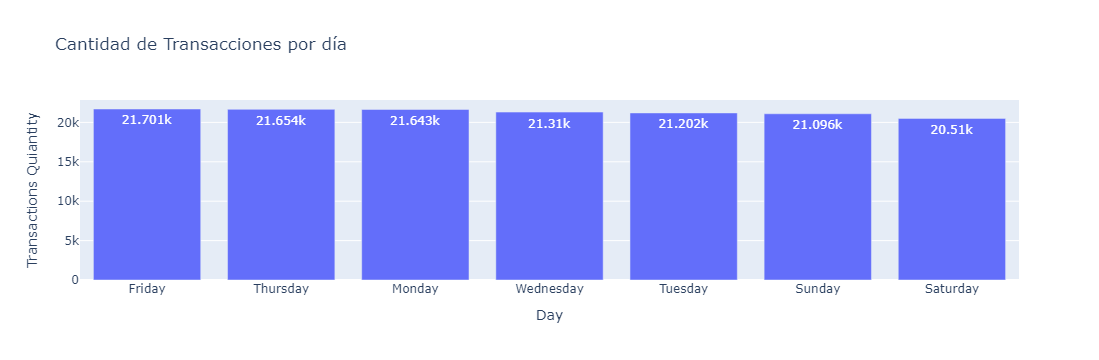

In [97]:
# Configuración gráfico
fig = px.bar(x=day_qty.index, y=day_qty.values,
             labels={'x': 'Day', 'y': 'Transactions Quiantity'},
             title='Cantidad de Transacciones por día',
             text_auto=True)

# Mostrar el gráfico
fig.show()

- **Observación:** Podemos apreciar que durante los días Viernes, Jueves y Lunes es cuando existen mayores ventas. Puede tener relación con los días en que las personas están más cansadas y necesitan consumir este tipo de productos que los mantiene más enérgicos (ejemplo: Café).
- **Gráfico utilizado:** Se ha utilizado un gráfico de barras vertical (librería plotly). Es amigable a simple vista y permite identificar claramente valores superiores e inferiores.

##### 2. Análisis de la Columna: **`transaction_time`**

In [98]:
# Revisámos valores únicos
df["transaction_time"].unique()

<DatetimeArray>
['1900-01-01 07:06:11', '1900-01-01 07:52:36', '1900-01-01 07:08:56',
 '1900-01-01 13:58:10', '1900-01-01 07:14:04', '1900-01-01 07:20:24',
 '1900-01-01 07:22:41', '1900-01-01 07:25:49', '1900-01-01 07:33:34',
 '1900-01-01 07:39:13',
 ...
 '1900-01-01 18:12:01', '1900-01-01 18:38:30', '1900-01-01 19:19:51',
 '1900-01-01 19:50:14', '1900-01-01 19:53:03', '1900-01-01 19:53:41',
 '1900-01-01 19:57:52', '1900-01-01 10:34:30', '1900-01-01 12:03:24',
 '1900-01-01 16:59:49']
Length: 25762, dtype: datetime64[ns]

In [144]:
# Debido a que cambiamos el tipo de dato a datetime, muestra la fecha y hora de la transacción. En este caso sólo nos interesa rescatar la hora (Variable creada)

# Revisemos valores únicos de Hora
df["hour"].unique()

array([ 7, 13,  8,  9, 11, 10, 12, 14, 15, 17, 16, 19, 18,  6, 20],
      dtype=int32)

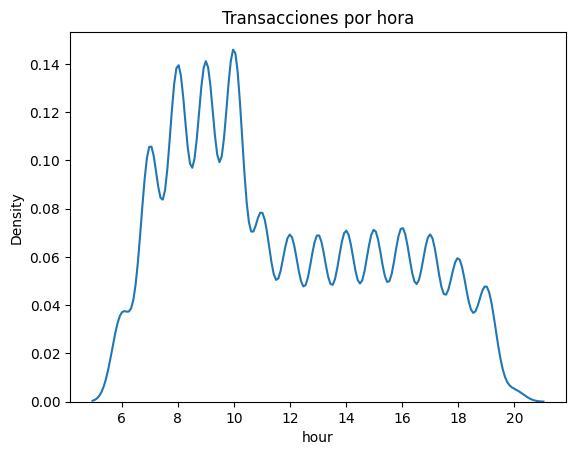

In [100]:
sns.kdeplot(df["hour"])
plt.title('Transacciones por hora')
plt.grid(False)
plt.show()

- **Observación:** Podemos apreciar que durante los horarios de la mañana (a.m.), es cuando existe la mayor cantidad de transacciones.
- **Gráfico utilizado:** Se ha utilizado un gráfico de Densidad de Kernel (librería matplotlib y seaborn). Mediante los picos más altos podemos apreciar en qué horarios ocurre la mayor cantidad de transacciones. 

##### 3. Análisis de la Columna: **`transaction_qty`**

In [101]:
# Revisámos valores únicos
df["transaction_qty"].unique()

array([2, 1, 3, 4, 8, 6])

In [102]:
# Revisamos las transacciones totales cantidad de producto vendido
sales_qty = df["transaction_qty"].value_counts()
sales_qty

transaction_qty
1    87159
2    58642
3     3279
4       23
8       10
6        3
Name: count, dtype: int64

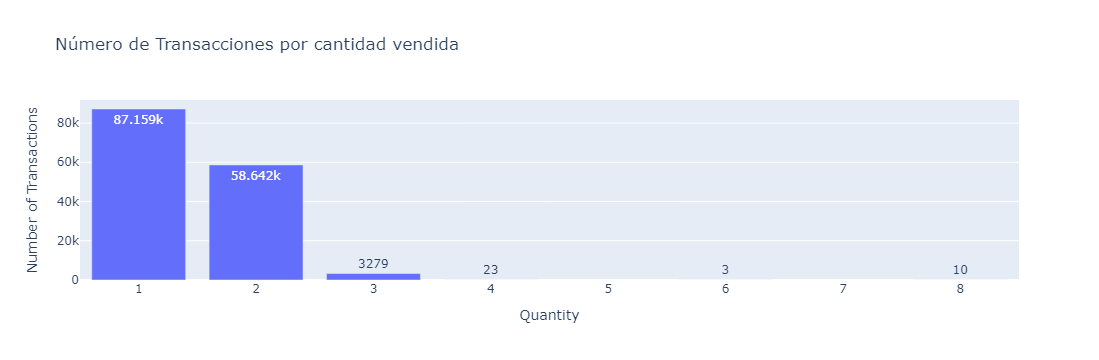

In [103]:
# Configuración gráfico
fig = px.bar(x=sales_qty.index, y=sales_qty.values,
             labels={'x': 'Quantity', 'y': 'Number of Transactions'},
             title='Número de Transacciones por cantidad vendida',
             text_auto=True)

# Mostrar el gráfico
fig.show()

- **Observación:** Podemos suponer que en la mayoría de las instancias de compra, los clientes compran entre 1 y 2 productos. En ocasiones puntuales han comprado más de 2 productos.
- **Gráfico utilizado:** Se ha utilizado un gráfico de barras vertical (librería plotly). Es amigable a simple vista y permite identificar claramente valores superiores e inferiores.

##### 4. Análisis de la Columna: **`store_location`**

In [104]:
# Revisámos valores únicos
df["store_location"].unique()

array(['Lower Manhattan', 'Astoria', "Hell's Kitchen"], dtype=object)

In [105]:
# Revisamos las transacciones totales por tienda
store_qty = df["store_location"].value_counts()
store_qty

store_location
Hell's Kitchen     50735
Astoria            50599
Lower Manhattan    47782
Name: count, dtype: int64

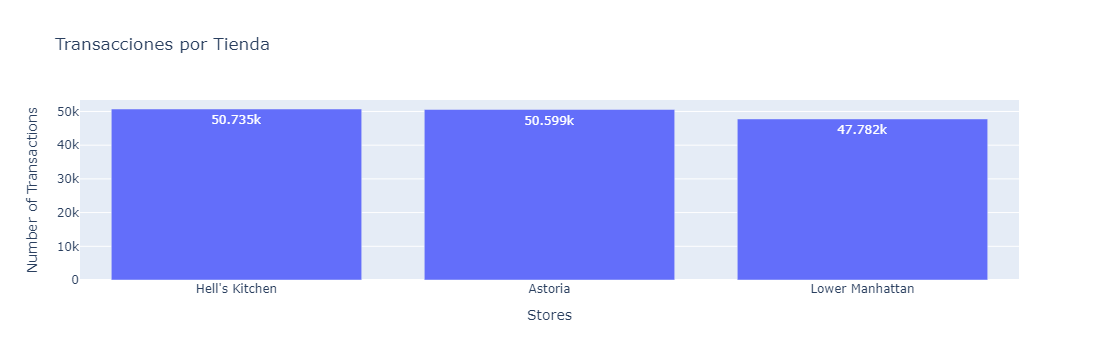

In [106]:
# Configuración gráfico
fig = px.bar(x=store_qty.index, y=store_qty.values,
             labels={'x': 'Stores', 'y': 'Number of Transactions'},
             title='Transacciones por Tienda',
             text_auto=True)

# Mostrar el gráfico
fig.show()

- **Observación:** Durante los 6 meses de registro de información, la tienda de Hell´s Kitchen es la que ha realizado la mayor cantidad de transacciones.
- **Gráfico utilizado:** Se ha utilizado un gráfico de barras vertical (librería plotly). Es amigable a simple vista y permite identificar claramente valores superiores e inferiores.

##### 5. Análisis de la Columna: **`unit_price`**

In [107]:
# Revisámos valores únicos
df["unit_price"].unique()

array([ 3.  ,  3.1 ,  2.5 ,  4.5 ,  2.  ,  4.25,  3.5 ,  2.55,  3.75,
        4.75,  3.25,  2.2 ,  4.  ,  2.45,  8.95,  0.8 , 21.  , 28.  ,
        6.4 , 18.  , 12.  , 19.75,  9.5 , 10.  , 20.45, 22.5 ,  9.25,
       14.75,  7.6 , 14.  , 10.95, 13.33, 15.  ,  4.38,  4.06,  4.69,
        5.63, 45.  , 23.  ,  2.1 ,  2.65])

<Axes: ylabel='unit_price'>

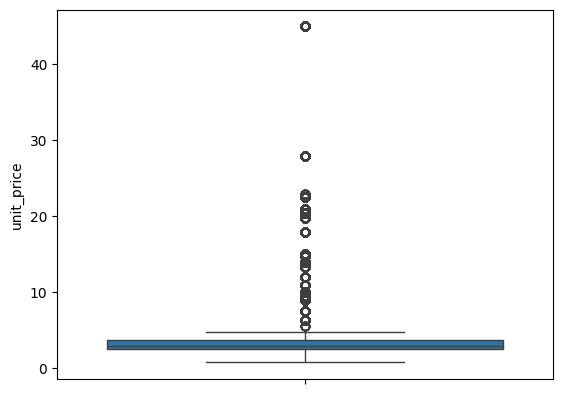

In [108]:
# Visualizamos boxplot de precios unitarios
sns.boxplot(y = "unit_price", data = df)

- **Observación:** Podríamos asumir que existen outliers en nuestros datos (columna unit_price). Sin embargo, si lo analizamos con un poco de detención, esta variación de precios debe estar relacionada a los diferentes tipos de productos que se venden en las tiendas.
- **Gráfico utilizado:** Se ha utilizado un boxplot (librería seaborn). Permite visualizar rápidamente la existencia de outliers en nuestra data.

##### 6. Análisis de la Columna: **`product_category`**

In [109]:
# Revisámos valores únicos
df["product_category"].unique()

array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Loose Tea',
       'Flavours', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
      dtype=object)

In [110]:
# Revisamos las transacciones totales por categoria de producto
category_qty = df["product_category"].value_counts()
category_qty

product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64

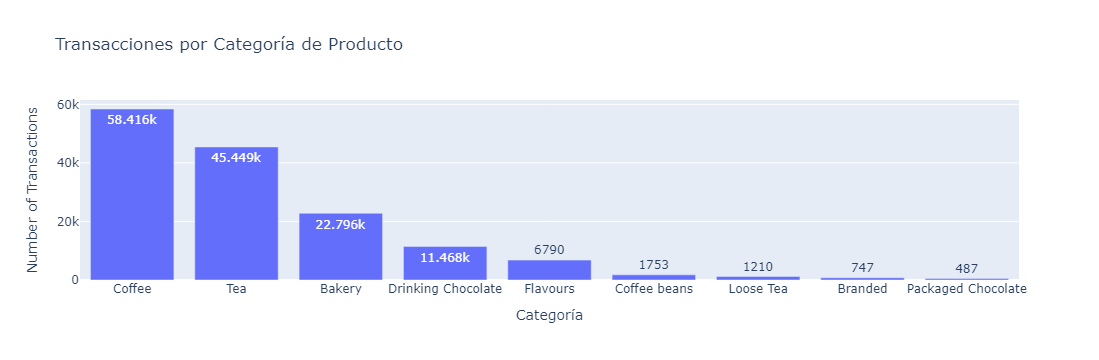

In [111]:
# Configuración gráfico
fig = px.bar(x=category_qty.index, y=category_qty.values,
             labels={'x': 'Categoría', 'y': 'Number of Transactions'},
             title='Transacciones por Categoría de Producto',
             text_auto=True)

# Mostrar el gráfico
fig.show()

- **Observación:** Podemos apreciar que las 3 categorías de productos que generan mayor cantidad de transacciones son: Coffe, Tea y Bakery.
- **Gráfico utilizado:** Se ha utilizado un gráfico de barras vertical (librería plotly). Es amigable a simple vista y permite identificar claramente valores superiores e inferiores.

#### V. Análisis de Correlación

In [112]:
# Identificar columnas numéricas
numerical_cols = df.select_dtypes(include=['number']).columns

# Mostrar las columnas numéricas
numerical_cols

Index(['transaction_qty', 'unit_price', 'year', 'hour', 'revenue'], dtype='object')

In [113]:
# Visualizamos algunas medidas estadísticas de estas variables
metrics_df = df[['transaction_qty', 'unit_price', 'year', 'hour', 'revenue']]
metrics_df.describe()

,transaction_qty,unit_price,year,hour,revenue
count,149116.000000,149116.000000,149116.0,149116.000000,149116.000000
mean,1.438276,3.382219,2023.0,11.735790,4.686367
std,0.542509,2.658723,0.0,3.764662,4.227099
min,1.000000,0.800000,2023.0,6.000000,0.800000
25%,1.000000,2.500000,2023.0,9.000000,3.000000
50%,1.000000,3.000000,2023.0,11.000000,3.750000
75%,2.000000,3.750000,2023.0,15.000000,6.000000
max,8.000000,45.000000,2023.0,20.000000,360.000000


In [116]:
# Mostramos la correlación entre estas variables
df.corr(numeric_only=True, method='spearman').style.background_gradient(cmap='seismic', vmin=-1, vmax=1)

,transaction_qty,unit_price,year,hour,revenue
transaction_qty,1.000000,-0.160442,nan,0.002365,0.680296
unit_price,-0.160442,1.000000,nan,-0.001150,0.529418
year,nan,nan,nan,nan,nan
hour,0.002365,-0.001150,nan,1.000000,0.004589
revenue,0.680296,0.529418,nan,0.004589,1.000000


**Resultados:**

1.**`Correlaciones Positivas:`**
  
  - **transaction_qty y revenue:** Existe una fuerte correlación positiva entre ambas variables. En cierta medida puede tener lógica si lo vemos desde el punto de vista que mientras mayor sea la cantidad de transacciones, mayor serán los ingresos.
  - **unit_price y revenue:** Acá también existe una correlación positiva entre las variables, sin embargo, es un poco menor. Se podría interpretar como si al aumentar el precio unitario de un producto, aumentará mi ingreso en cada venta; esto si hacemos la comparación de qué pasaría si mantenemos el precio unitario estático.


2.**`Correlaciones Negativas:`**

- **transaction_qty y unit_price:** La correlación entre ambas variables es negatica y débil. Una interpretación podría ser que cuando se venden más productos, el precio unitario tiende a disminuir ligeramente, o al revés.


3.**`Valores NaN:`**

- **year y otras variables:** Los valores NaN en la fila y columna de "year" indican que no hay datos disponibles para calcular la correlación con esta variable.


4.**`Correlación variables Hour:`**

- **hour y otras variables:** Las correlaciones entre "hour" y las otras variables son muy débiles, lo que sugiere que la hora del día no tiene una influencia significativa en las otras variables.


**Conclusiones Previas:**

- Podríamos inferir que la cantidad de transacciones y los ingresos están fuertemente relacionados.
- Por otro lado, podrías indicar que el precio unitario de los poductos y los ingresos también están relacionados, pero en menor medida.
- Por último, podríamos indicar que la hora del día no parece tener un impacto significativo en las otras variables (esto se analizará más adelante).

#### VI. Análisis Multivariado y Visualizaciones

- A medida que se ha ido analizando la información, han surgido un par de interrogantes que se pretenden responder en este apartado.
- Se busca combinar un par de variables para responderlas.

- **Interrogantes:**

1. Saber, ¿Cuáles son los productos que se han vendido en mayor cantidad durante estos seis meses?, ¿y cuáles han sido los que se venden con mayor frecuencia?
2. Reconocer, ¿Cuáles son los productos que han generado mayores ingresos?, ¿y cómo ha sido su comportamiento de manera mensual?
3. Conocer, ¿Cuáles son los horarios de mayor demanda de productos?
4. Identificar, ¿Cuál de las 3 sucursales es la que ha generado mayores ingresos durante los seis meses?

##### **Pregunta 1: ¿Cuáles son los productos que se han vendido en mayor cantidad durante estos seis meses?, ¿y cuáles han sido los que se venden con mayor frecuencia?**

In [120]:
# Acá respodemos la primera interrogante:

# Calculo de cantidad total vendida (se agrupa product_category y product_type para analizar los datos por producto)
product_sales = df.groupby(["product_category", "product_type"]).agg(total_qty = ("transaction_qty", "sum"))

# Ordenamos los datos de mayor a menor para el gráfico
product_sales = product_sales.sort_values(by=["total_qty"], ascending=False).reset_index()

# Mostramos las primeras filas
product_sales.head()

,product_category,product_type,total_qty
0,Tea,Brewed Chai tea,26250
1,Coffee,Gourmet brewed coffee,25973
2,Coffee,Barista Espresso,24943
3,Tea,Brewed Black tea,17462
4,Drinking Chocolate,Hot chocolate,17457


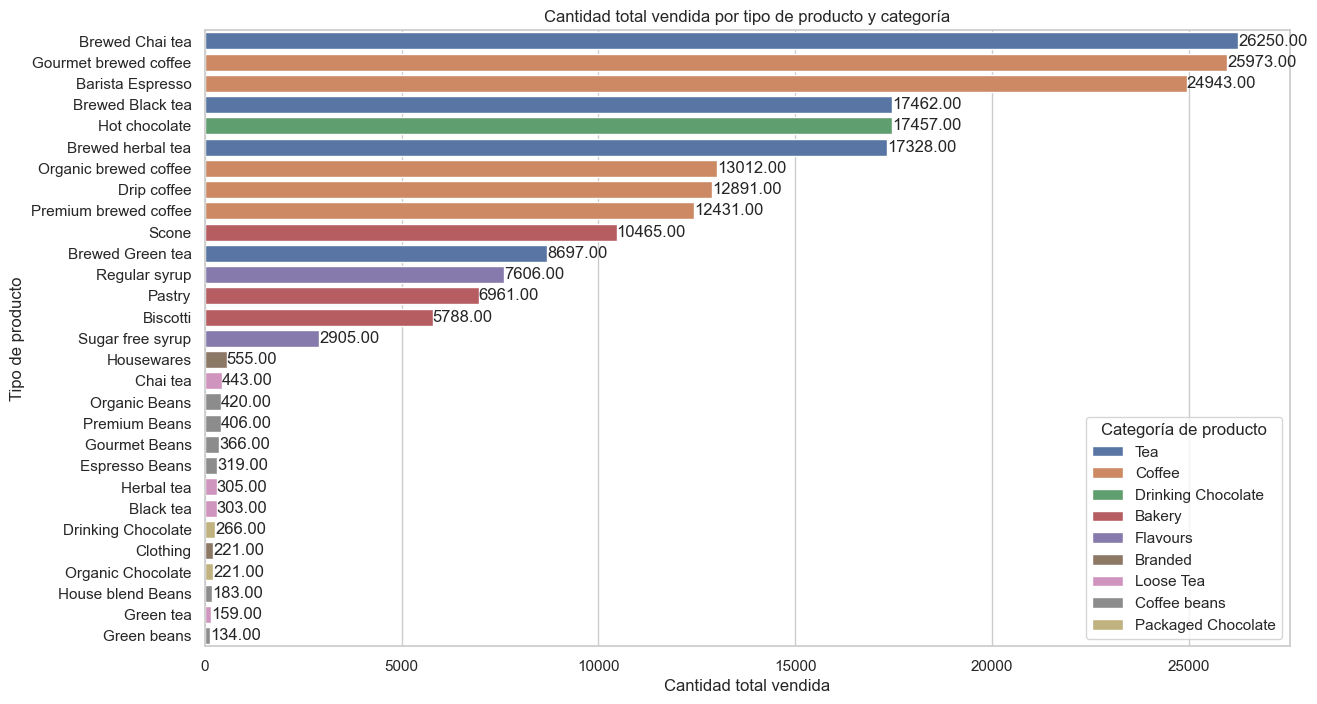

In [121]:
# Configuración de parámetros del gráfico
sns.set(style="whitegrid")

# Creación del gráfico de cantidad total vendida por categoría de producto
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=product_sales, x='total_qty', y='product_type', hue='product_category', dodge=False)

# Añadir etiquetas de datos a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')  # fmt='%.2f' formatea las etiquetas con dos decimales
    
plt.title('Cantidad total vendida por tipo de producto y categoría')
plt.xlabel('Cantidad total vendida')
plt.ylabel('Tipo de producto')
plt.legend(title='Categoría de producto')
plt.show()

In [122]:
# Acá respondemos la segunda interrogante:

# Calculo de frecuencia de venta por producto (se agrupa product_category y product_type)
frecuency = df.groupby(["product_category", "product_type"]).agg(frecuency = ("transaction_qty", "count"))

# Ordenamos los datos de mayor a menor para el gráfico
frecuency = frecuency.sort_values(by=["frecuency"], ascending=False).reset_index()

# Mostramos las primeras filas
frecuency.head()

,product_category,product_type,frecuency
0,Tea,Brewed Chai tea,17183
1,Coffee,Gourmet brewed coffee,16912
2,Coffee,Barista Espresso,16403
3,Drinking Chocolate,Hot chocolate,11468
4,Tea,Brewed Black tea,11350


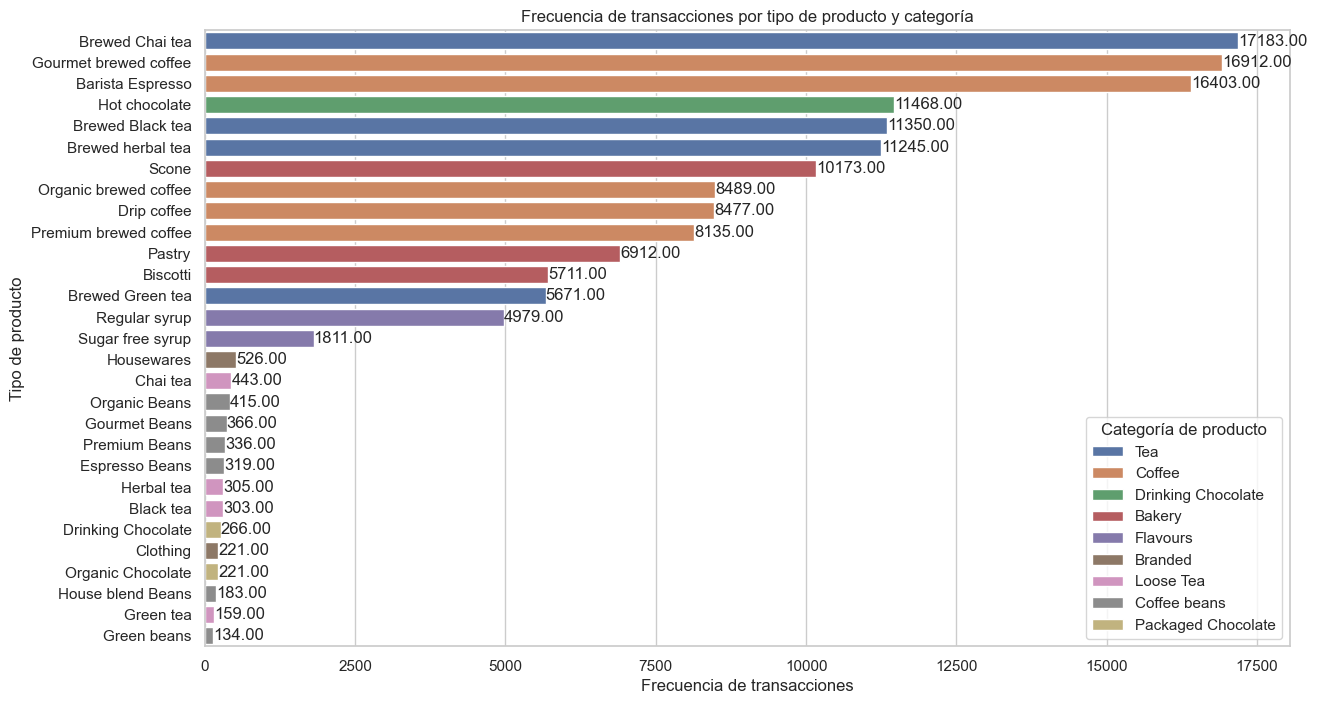

In [123]:
# Configuración de parámetros del gráfico
sns.set(style="whitegrid")

# Creación del gráfico de la frecuencia de las transacciones por categoria de producto
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=frecuency, x='frecuency', y='product_type', hue='product_category', dodge=False)

# Añadir etiquetas de datos a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')  # fmt='%.2f' formatea las etiquetas con dos decimales
    
plt.title('Frecuencia de transacciones por tipo de producto y categoría')
plt.xlabel('Frecuencia de transacciones')
plt.ylabel('Tipo de producto')
plt.legend(title='Categoría de producto')
plt.show()

**Respuesta:** 

En base a la información analizada, podemos concluir lo siguiente:

- Los 5 productos con mayor cantidad de ventas (según el tipo de producto), son:
  1. Brewed Chai Tea
  2. Gourmet brewed coffee
  3. Barista Espresso
  4. Brewed Black Tea
  5. Hot Chocolate
- Los 5 productos con mayor frecuencia de transacciones (según el tipo de producto), son:
  1. Brewed Chai Tea 
  2. Gourmet brewed coffee
  3. Barista Espresso
  4. Hot Chocolate
  5. Brewed Black Tea

**Gráficos utilizados:** Corresponden a gráficos de barra horizontal (librerías matplotlib y seaborn). Se ha utilizado esta opción dada la cantidad de tipos de productos (29) que presenta el dataset; la finalidad de los gráficos es mostrar las cantidades vendidas de cada producto y la frecuencia en que se han vendido. Por otro lado, se buscó tener una mejor visualización de los datos y que no se solapen uno con otro.

##### **Pregunta 2: ¿Cuáles son los productos que han generado mayores ingresos?, ¿y cómo ha sido su comportamiento de manera mensual?**

In [124]:
# Acá se responde a la primera interrogante:

# Calculo de venta total (se agrupa product_category y product_type para analizar los datos por producto)
total_revenue = df.groupby(["product_category", "product_type"]).agg(total_revenue = ("revenue", "sum"))

# Ordenamos los datos de mayor a menor para el gráfico
total_revenue = total_revenue.sort_values(by=["total_revenue"], ascending=False).reset_index()

# Mostramos las primeras filas
total_revenue.head()

,product_category,product_type,total_revenue
0,Coffee,Barista Espresso,91406.20
1,Tea,Brewed Chai tea,77081.95
2,Drinking Chocolate,Hot chocolate,72416.00
3,Coffee,Gourmet brewed coffee,70034.60
4,Tea,Brewed Black tea,47932.00


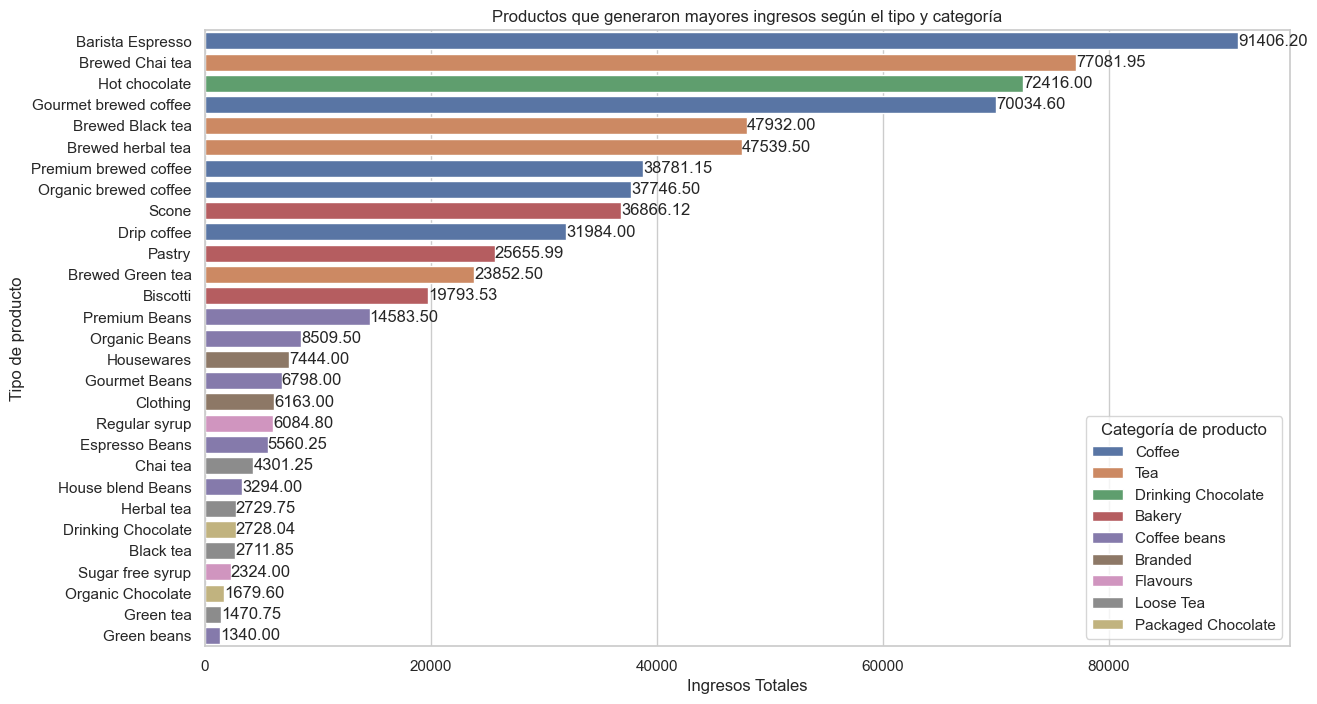

In [125]:
# Configuración de parámetros del gráfico
sns.set(style="whitegrid")

# Creación del gráfico que representa distribución de ingresos por producto
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=total_revenue, x='total_revenue', y='product_type', hue='product_category', dodge=False)

# Añadir etiquetas de datos a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')  # fmt='%.2f' formatea las etiquetas con dos decimales

plt.title('Productos que generaron mayores ingresos según el tipo y categoría')
plt.xlabel('Ingresos Totales')
plt.ylabel('Tipo de producto')
plt.legend(title='Categoría de producto')
plt.show()

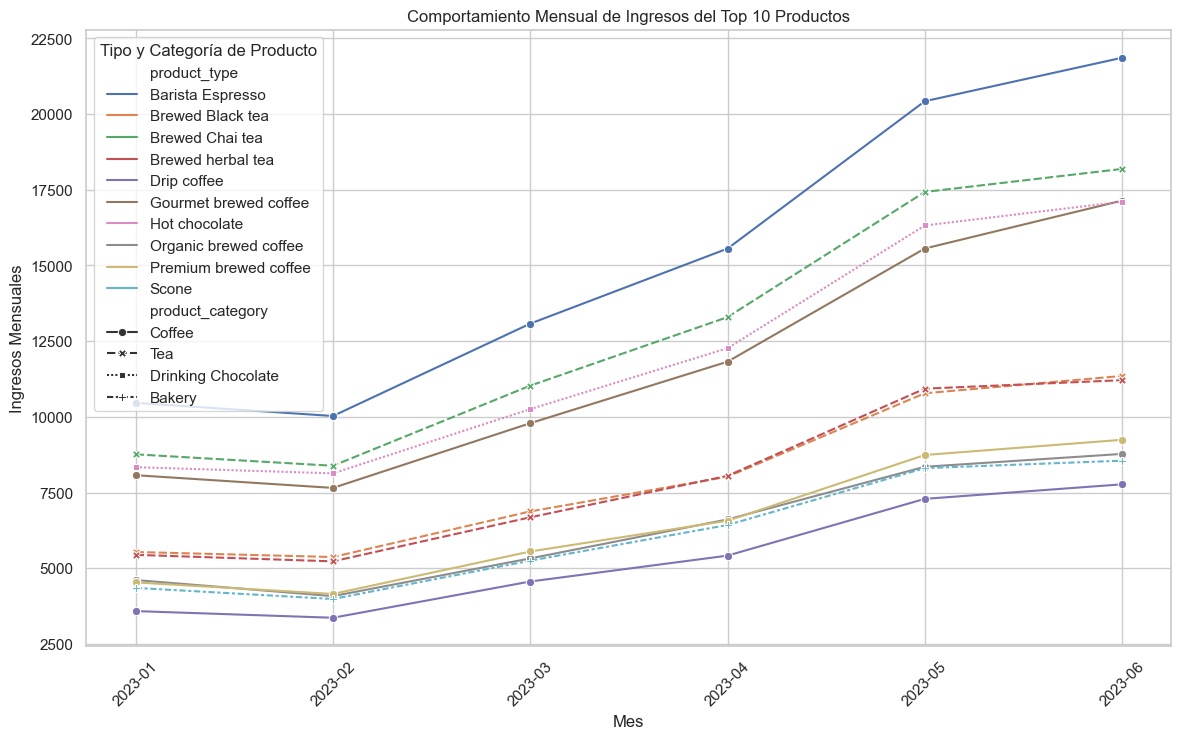

In [126]:
# Acá se responde a la segunda interrogante: 

# Creación de gráfico que muestra comportamiento mensual de los ingresos generado por el Top 10 de los productos

# Se vuelve a trabajr en varibale 'Month', para que quede en formato Año-Mes, lo cual permite mostrar los datos ordenados según el periodo
df['month'] = df['transaction_date'].dt.strftime('%Y-%m')

# Agrupar por tipo de producto, categoría y mes, sumando los ingresos
monthly_revenue = df.groupby(['product_type', 'product_category', 'month'])['revenue'].sum().reset_index()

# Calcular ingresos totales por producto
total_revenue = df.groupby(['product_type', 'product_category'])['revenue'].sum().reset_index()

# Ordenar productos por ingresos totales y seleccionar el top 10
top_10_products = total_revenue.sort_values(by='revenue', ascending=False).head(10)

# Filtrar los datos mensuales para los top 10 productos
top_10_data = monthly_revenue[monthly_revenue['product_type'].isin(top_10_products['product_type'])]

# configuración de Gráfico de Líneas que muestra el Comportamiento Mensual de los productos
plt.figure(figsize=(14, 8))
sns.lineplot(data=top_10_data, x='month', y='revenue', hue='product_type', style='product_category', markers=True)
plt.title('Comportamiento Mensual de Ingresos del Top 10 Productos')
plt.xlabel('Mes')
plt.ylabel('Ingresos Mensuales')
plt.xticks(rotation=45)
plt.legend(title='Tipo y Categoría de Producto')
plt.grid(True)
plt.show()

**Respuesta:**

- En base a la información analizada, los 5 productos que han generado mayores ingresos durante todo el periodo que comprende el dataset (enero a junio 2023), son los siguientes:
  1. Coffe - Barista Espresso: **USD 91.406,20**
  
  2. Tea - Brewed Chai Tea: **USD 77.081,95**
      
  3. Drinking Chocolate - Hot chocolate: **USD 72.416,00**
     
  4. Coffee - Gourmet brewed coffe: **USD 70.034,60**
     
  5. Tea - Brewed Black Tea: **USD 47.932,00**
      
- Respecto al comportamiento mensual de los ingresos, podemos apreciar mediante el gráfico de líneas que a partir de febrero 2023 han ido en incremento, siendo estos mismos productos los que lideran los ingresos percibidos.

**Gráficos utilizados:** En el primer caso, para identificar aquellos productos que han generado la mayor cantidad de ingresos, se ha utilizado un gráfico de barras horizontal (librerías matplotlib y seaborn). Al igual que en la pregunta anterior, su finalidad es mostrar todos los tipos de productos y su contibución en terminos de ingresos. En el segundo caso, para mostrar el comportamiento mensual de los productos (TOP 10), se ha utilizado un gráfico de lineas (librerías matplotlib y seaborn), el cual generalmente es utilizado para mostrar este tipo de información, dado que visualmente podemos identificar de manera rápida el evolutivo de un producto en específico.

##### **Pregunta 3: ¿Cuáles son los horarios de mayor demanda de productos?**

In [129]:
# Debido a que en el análisis de correlación las variables "hour" no presentaba relación con otras variables, se ha decidido volver analizar este punto.

# Mostramos transacciones por hora
transactions_hour = df['hour'].value_counts()
transactions_hour

hour
10    18545
9     17764
8     17654
7     13428
11     9766
16     9093
15     8979
14     8933
17     8745
13     8714
12     8708
18     7498
19     6092
6      4594
20      603
Name: count, dtype: int64

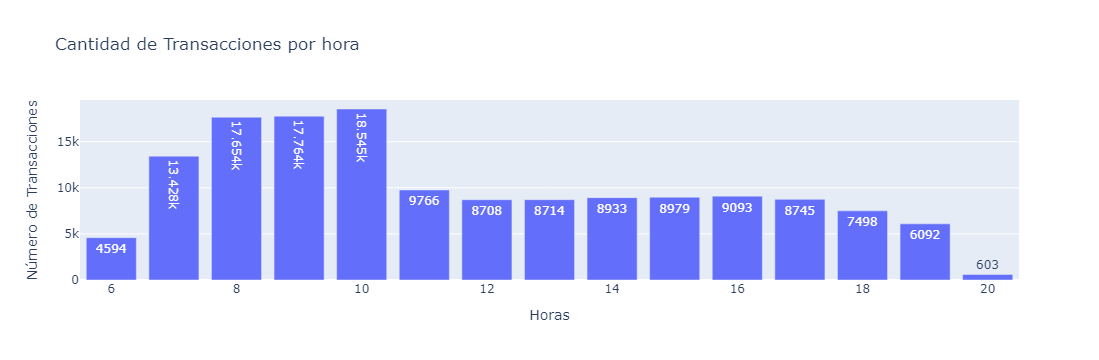

In [130]:
# Configuración de gráfico para representar el total de transacciones por hora
fig = px.bar(
    x=transactions_hour.index, 
    y=transactions_hour.values,
    labels={'x': 'Horas', 'y': 'Número de Transacciones'},
    title='Cantidad de Transacciones por hora', 
    text_auto=True
)

# Mostramos el gráfico
fig.show()

**Respuesta:**

- Como podemos apreciar mediante el gráfico, los horarios donde existe mayor demanda de productos y/o existe la mayor cantidad de transacciones, son entre las 7 y 10 a.m. Dato importante, al momento de potenciar el negocio o por ejemplo, armar un plan estratégico para aumentar ventas.
- Respecto al Análisis de Correlación podemos indicar que no existe una relación lineal directa entre la variable "hour" y las demás; sin embargo, el gráfico de barras evidencia una tendencia del comportamiento de las transacciones a medida que transcurren las horas (en horario de 7 a 10 a.m. aumentan, y a partir de las 11 a.m. disminuyen y se mantienen hasta las 6 p.m, aproximadamente).
  
**Gráficos Utilizados:** Se utilizó un gráfico de barras verticales para representar los horarios donde existe mayor demanda de productos (se utiliza librería Plotly).

##### **Pregunta 4: ¿Cuál de las 3 sucursales es la que ha generado mayores ingresos durante los seis meses?**

In [131]:
# Mostramos los nombres de las tiendas
df['store_location'].unique()

array(['Lower Manhattan', 'Astoria', "Hell's Kitchen"], dtype=object)

In [133]:
# Calculo de ingresos totales por tienda
total_revenue_store = df.groupby(["store_location"]).agg(total_revenue_store = ("revenue", "sum"))

# Ordenamos los datos de mayor a menor para el gráfico
total_revenue_store = total_revenue_store.sort_values(by=["total_revenue_store"], ascending=False).reset_index()

# Mostramos las primeras filas
total_revenue_store.head()

,store_location,total_revenue_store
0,Hell's Kitchen,236511.17
1,Astoria,232243.91
2,Lower Manhattan,230057.25


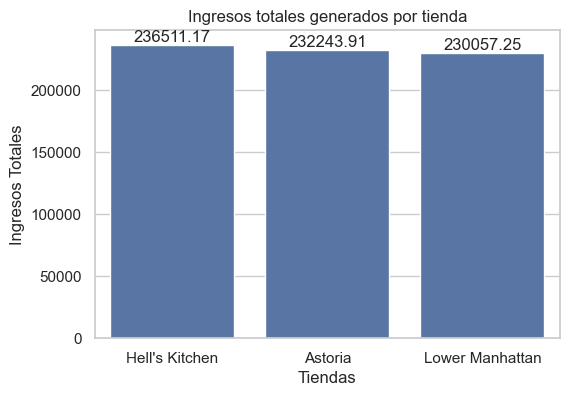

In [139]:
# Configuración de parámetros del gráfico
sns.set(style="whitegrid")

# Creación del gráfico que representa los ingresos totales generados por tienda
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=total_revenue_store, x='store_location', y='total_revenue_store', dodge=False)

# Añadir etiquetas de datos a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')  # fmt='%.2f' formatea las etiquetas con dos decimales

plt.title('Ingresos totales generados por tienda')
plt.xlabel('Tiendas')
plt.ylabel('Ingresos Totales')
plt.show()

**Respuesta:**

- Como podemos apreciar mediante el gráfico, la tienda de Hell's Kitchen es la que ha generado mayores ingresos (USD 236.511,17), en el periodo de Enero a Junio 2023.

**Gráfico Utilizado:** Se ha utilizado un gráfico de barras (librerías Matplotlib y Seaborn). Esto ha permitido identificar rápidamente cuál de las 3 sucursales es la que ha generado mayores ingresos.